# TMDB Box office prediction [link](https://www.kaggle.com/c/tmdb-box-office-prediction/)
#### This is final project of course work CSIS-4260 Special Topics in Data Analytics
* Tarek Ahmed 
* Mir Imran Elahi

# Table of contents
* [Introduction](#introduction)
* [Import libraries](#libraries)
* [Load Data](#load)
* [Data Overview](#overview)
* [Data Manipulation](#manipulation)
* [EDA](#eda)
  - [Yearly budget and revenue comparison](#eda1)
  - [Movie Release count by Weekday](#eda2)
  - [Average Revenue By Month](#eda3)
  - [Quarterly Movie Avg. Revenue](#eda4)
  - [Logarithm Transformation](#eda5)
  - [Comparing Relationship with Revenue](#eda6)
  - [Remove outlier](#eda7)
  - [Relationship Between the Home page and Revenue](#eda8)
  - [Correlation Analysis](#eda9)
  - [Correlation between Revenue and Budget](#eda10)
  - [Correlation between Revenue and Popularity](#eda11)
  
* [Model Evaluation](#evaluation)
  - [Linear Regression](#lr)

# Introduction <a id="introduction"/>
 
For our project, we have been working on TMDB box office dataset to predict the international box office revenue for each movie.

The dataset has provided 7398 movies and a variety of metadata obtained from The Movie Database (TMDB). Movies are labelled with id. Data points include cast, crew, plot keywords, budget, posters, release dates, languages, production companies, and countries.

Train and Test datasets had been provided. So, We worked on predicting the worldwide revenue for 4398 movies in the test file.

# Import libraries <a id="libraries"></a>

In [1]:
#Common libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#Libraries I have used for this notebook
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import r2_score,mean_squared_error
import ast
import math

%matplotlib inline
plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")

In [2]:
%%javascript
// Run this code to remove scrolling on views/vizualization
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Load data <a id="load"/>

We have loaded the provided train and test datasets.

In [3]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

pd.DataFrame([train.shape,test.shape,submission.shape],columns =['Row','Col'],index=['Train','Test','Submission'])

,Row,Col
Train,3000,23
Test,4398,22
Submission,4398,2


Initially we have 3000 values in datasets for training and 4398 values for testing. 

# Data Overview <a id="overview"/>
 
Before starting work on the provided dataset, we have tried to get the basic information about the data - the number of columns, what they are and their datatypes. 


In [4]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

#### About Dataset:
* id: Integer unique id of each movie
* belongs_to_collection: Contains the TMDB Id, Name, Movie Poster and Backdrop URL of a movie in JSON format.
* budget: Budget of a movie in dollars. Some row contains 0 values which mean unknown.
* genres: Contains all the Genres Name & TMDB Id in JSON Format.
* homepage: Contains the official URL of a movie.
* imdb_id: IMDB id of a movie (string).
* original_language: Two digit code of the original language, in which the movie was made.
* original_title: The original title of a movie in original_language.
* overview: Brief description of the movie.
* popularity: Popularity of the movie.
* poster_path: Poster path of a movie. You can see full poster image by adding url after this link 
* production_companies: All production company name and TMDB id in JSON format of a movie.
* production_countries: Two digit code and full name of the production company in JSON format.
* release_date: Release date of a movie in mm/dd/yy format.
* runtime: Total runtime of a movie in minutes (Integer).
* spoken_languages: Two digit code and full name of the spoken language.
* status: Is the movie released or rumored?
* tagline: Tagline of a movie
* title: English title of a movie
* Keywords: TMDB Id and name of all the keywords in JSON format.
* cast: All cast TMDB id, name, character name, gender (1 = Female, 2 = Male) in JSON format
* crew: Name, TMDB id, profile path of various kind of crew members job like Director, Writer, Art, Sound etc.
* revenue: Total revenue earned by a movie in dollars.

head() function returns the first 5 rows of the data frame by default, but we wanted to see first 3 rows of both datesets (train & test) to get the idea of the dataset.

In [5]:
train.head(3).T

,0,1,2
id,1,2,3
belongs_to_collection,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...","[{'id': 107674, 'name': 'The Princess Diaries ...",NaN
budget,14000000,40000000,3300000
genres,"[{'id': 35, 'name': 'Comedy'}]","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 18, 'name': 'Drama'}]"
homepage,NaN,NaN,http://sonyclassics.com/whiplash/
imdb_id,tt2637294,tt0368933,tt2582802
original_language,en,en,en
original_title,Hot Tub Time Machine 2,The Princess Diaries 2: Royal Engagement,Whiplash
overview,"When Lou, who has become the ""father of the In...",Mia Thermopolis is now a college graduate and ...,"Under the direction of a ruthless instructor, ..."
popularity,6.57539,8.24889,64.3


In [6]:
test.head(3).T

,0,1,2
id,3001,3002,3003
belongs_to_collection,"[{'id': 34055, 'name': 'Pokémon Collection', '...",NaN,NaN
budget,0,88000,0
genres,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...","[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...","[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '..."
homepage,http://www.pokemon.com/us/movies/movie-pokemon...,NaN,NaN
imdb_id,tt1226251,tt0051380,tt0118556
original_language,ja,en,en
original_title,ディアルガVSパルキアVSダークライ,Attack of the 50 Foot Woman,Addicted to Love
overview,Ash and friends (this time accompanied by newc...,When an abused wife grows to giant size becaus...,Good-natured astronomer Sam is devastated when...
popularity,3.85153,3.55979,8.08519


describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the DataFrame.

With this summary, we have access to a lot of information about my dataset, such as number of rows, standard deviation, minimum, maximum, and all three quartiles.

In [7]:
train.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


To get a quick overview of the dataset we use the dataframe.info() function.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

We can see on the above, total 3000 entries with 23columns. For each column, we do not have any missing values (non-null).

Let's try to find out the "NA" values of each variable.

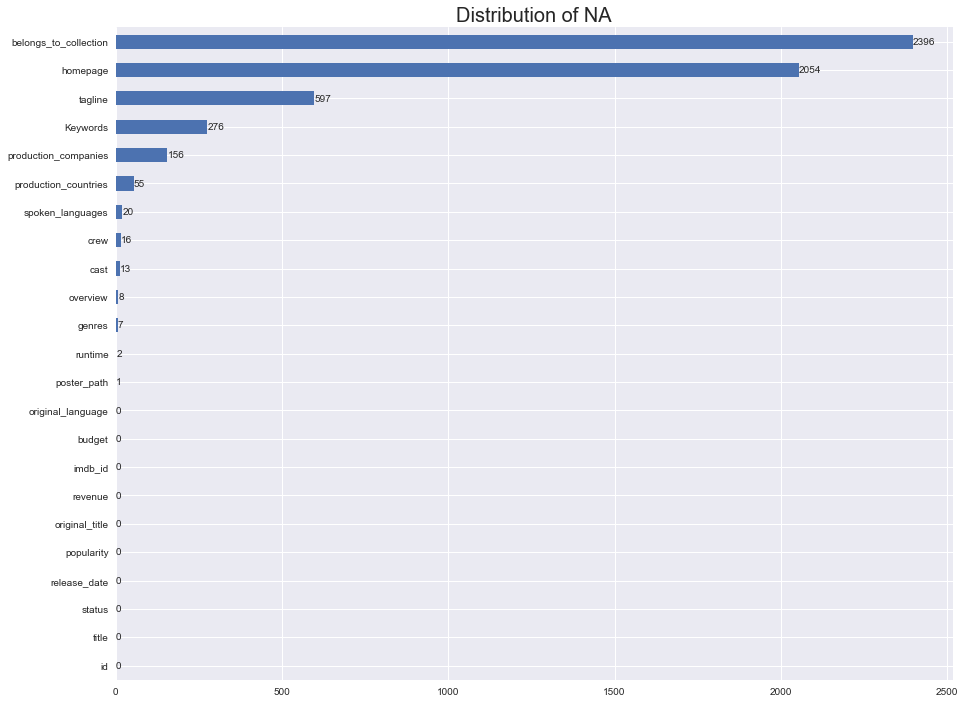

In [9]:
plt.figure(figsize=(15,12))

train_na = train.isna().sum().sort_values(ascending=True)
train_na.plot(kind='barh')
plt.title('Distribution of NA',fontsize=20)

for i,v in enumerate(sorted(train_na)):
    plt.text(v,i,str(v),va="center")

belongs_to_collection has the higest NA values (2396).

## Data Manipulation <a id="manipulation"/>
##### Converting to Dict

Converting the object type column into a dictionary type and count the value of each column.

ast.literal_eval(x) converts a string with json into python dictionary, which can be used later.

In [10]:
dict_columns = ['belongs_to_collection', 'genres', 'production_companies','production_countries', 'spoken_languages', 
                'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df

train = text_to_dict(train)
test = text_to_dict(test)

In [11]:
# Has collection
train['has_collection'] = train['belongs_to_collection'].apply(lambda x: len(x) if x!= {} else 0)
test['has_collection'] = test['belongs_to_collection'].apply(lambda x: len(x) if x!= {} else 0)
# Genre
train['num_genres'] = train['genres'].apply(lambda x: len(x) if x != {} else 0)
test['num_genres'] = test['genres'].apply(lambda x: len(x) if x != {} else 0)
# Production Company
train['num_production'] = train['production_companies'].apply(lambda x: len(x) if x!={} else 0)
test['num_production'] = test['production_companies'].apply(lambda x: len(x) if x!={} else 0)
# Keywords
train['num_keywords'] = train['Keywords'].apply(lambda x: len(x) if x!={} else 0)
test['num_keywords'] = test['Keywords'].apply(lambda x: len(x) if x!={} else 0)
# Cast
train['num_cast'] = train['cast'].apply(lambda x: len(x) if x!={} else 0)
test['num_cast'] = test['cast'].apply(lambda x: len(x) if x!={} else 0)
# Crew
train['num_crew'] = train['crew'].apply(lambda x: len(x) if x!={} else 0)
test['num_crew'] = test['crew'].apply(lambda x: len(x) if x!={} else 0)

train['has_homepage'] = 1
test['has_homepage'] = 1
train.loc[train['homepage'].isnull(),"has_homepage"] = 0
test.loc[test['homepage'].isnull(),"has_homepage"] = 0

Let's check if there’s any unreleased or rumored movie list in the status column.

In [12]:
train['status'].apply(lambda x: 1 if x=='Released' else 0).value_counts()

1    2996
0       4
Name: status, dtype: int64

Let’s create new columns for release weekday,  date, month, quarter and year.

In [13]:
train['release_date'] = train['release_date'].fillna(method='ffill')
test['release_date'] = test['release_date'].fillna(method='ffill')
    
    
def process_release_date(df):
    df['release_date'] = pd.to_datetime(df['release_date'])
    df['release_month'] = df['release_date'].dt.month
    df['release_day'] = df['release_date'].dt.day
    df['release_quarter'] = df['release_date'].dt.quarter
    df['release_weekday'] = df['release_date'].dt.day_name()
    df['release_year'] = df['release_date'].dt.year
    
    return df

train = process_release_date(train)
test = process_release_date(test)

Text(0.5, 1.0, 'Release Year vs Revenue')

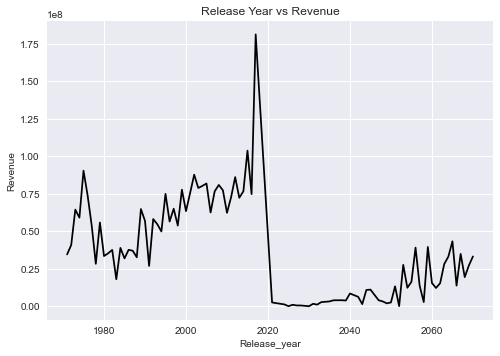

In [14]:
train.groupby('release_year')['revenue'].mean().plot(color='black')
plt.xlabel('Release_year',fontsize = 10)
plt.ylabel('Revenue',fontsize = 10);
plt.title("Release Year vs Revenue")

We can see that the time frame is wide, the soonest released year was 1971 and the latest was 2070 which is impossible. 

For all these reasons, we are going to use only release year before 2017.

In [15]:
train = train[train['release_year']<2017]

Here we are droping some unwanted columns which are not needed for our analysis but we can’t drop any row for the test dateset.

In [16]:
cols_to_delete = ['homepage','imdb_id','status','poster_path','release_date','belongs_to_collection', 'genres','overview', 
                  'production_companies','production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew','tagline',
                 'title']

train.drop(columns=cols_to_delete,axis=1,inplace=True)
test.drop(columns=cols_to_delete,axis=1,inplace=True)

In [17]:
pd.DataFrame([train.shape,test.shape,submission.shape],columns =['Row','Col'],index=['Train','Test','Submission'])

,Row,Col
Train,2800,19
Test,4398,18
Submission,4398,2


Still we have NA values from column 'runtime' so we will use pandas fill method with ffill which indicates it will fill based on the forward data. 

In [18]:
pd.DataFrame([train.isna().sum().sort_values(ascending=True),test.isna().sum().sort_values(ascending=True)]).T

,0,1
id,0.0,0.0
release_quarter,0.0,0.0
release_day,0.0,0.0
release_month,0.0,0.0
has_homepage,0.0,0.0
num_crew,0.0,0.0
num_cast,0.0,0.0
num_keywords,0.0,0.0
release_weekday,0.0,0.0
num_production,0.0,0.0


In [19]:
train.fillna(method='ffill',inplace=True)
test.fillna(method='ffill',inplace=True)

pd.DataFrame([train.shape,test.shape,submission.shape],columns =['Row','Col'],index=['Train','Test','Submission'])

,Row,Col
Train,2800,19
Test,4398,18
Submission,4398,2


# Exploratory Data Analysis <a id="eda"/>

#### Yearly budget and revenue comparison <a id="eda1"/>

Text(0.5, 1.0, 'Yearly budget graph')

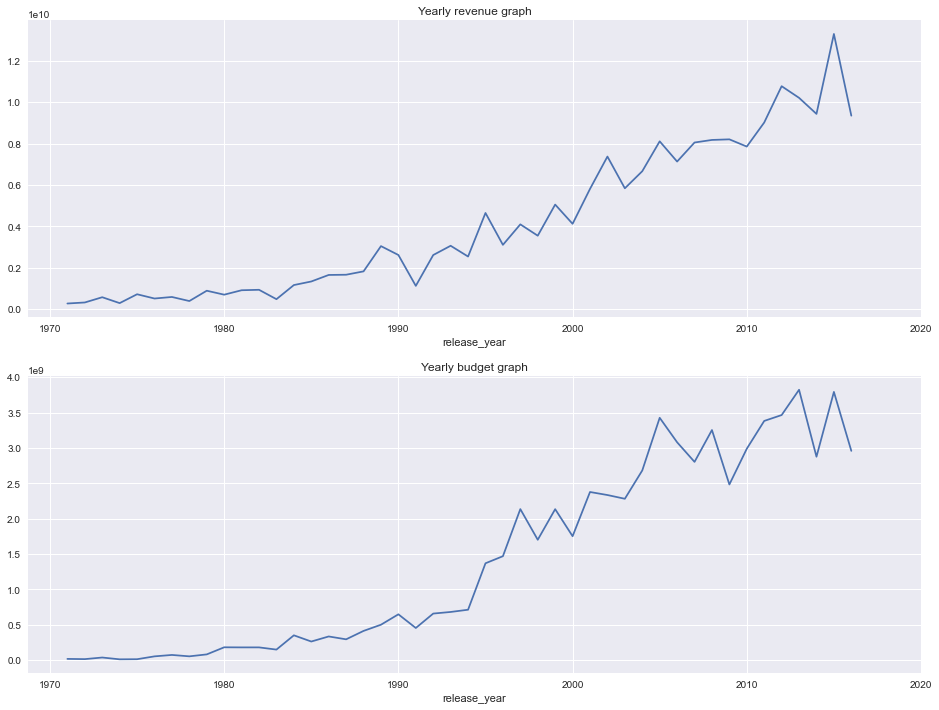

In [20]:
plt.figure(figsize=(16, 12))
plt.subplot(2, 1, 1)
train.groupby('release_year')['revenue'].sum().plot()
plt.xticks([1970,1980,1990,2000,2010,2020])
plt.title("Yearly revenue graph")
plt.subplot(2, 1, 2)
train.groupby('release_year')['budget'].sum().plot()
plt.xticks([1970,1980,1990,2000,2010,2020])
plt.title("Yearly budget graph")

Both graphs indicate that Movie's budget and revenue gradually increasing yearly.
 
#### Movie Release count by Weekday <a id="eda2" />
 
Let’s check on which day of week most movies are released

Text(0, 0.5, 'No of releases')

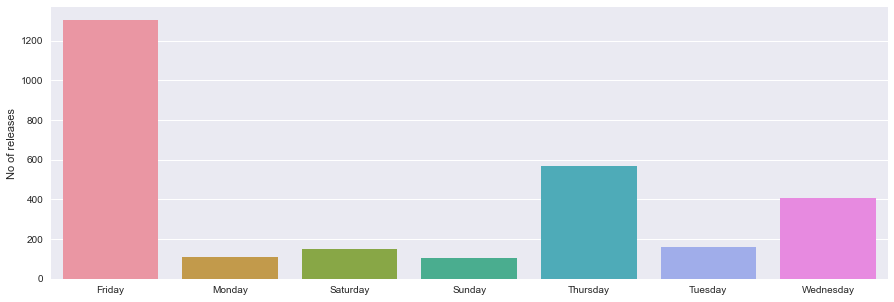

In [21]:
days = train['release_weekday'].value_counts().sort_index()
plt.figure(figsize=(15,5))
sns.barplot(days.index,days)
plt.ylabel('No of releases')

Maximum number of movies released on Friday

#### Average Revenue By Month <a id="eda3" />

Let’s check in which month most revenue earned on average from the movies released

Text(0.5, 1.0, 'Avg. Revenue Each Month')

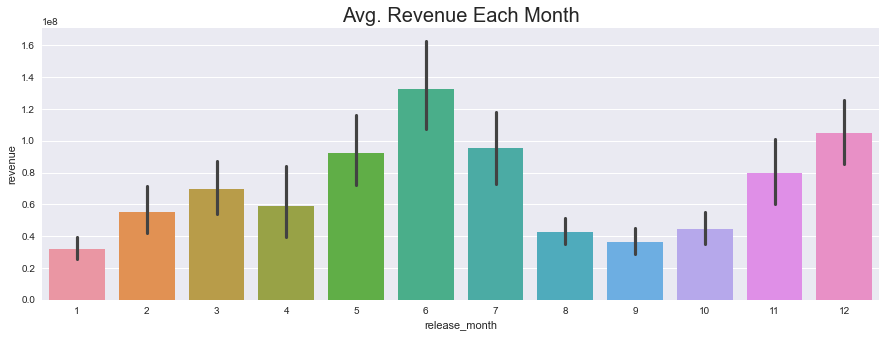

In [22]:
plt.figure(figsize=(15,5))
sns.barplot(x='release_month',y='revenue',data=train)
plt.title('Avg. Revenue Each Month',fontsize=20)

 Most revenue earned on average earning month for the movies is June
 
 #### Quarterly Movie Avg. Revenue <a id="eda4" />

Text(0.5, 1.0, 'Avg. Revenue in Each Quarter')

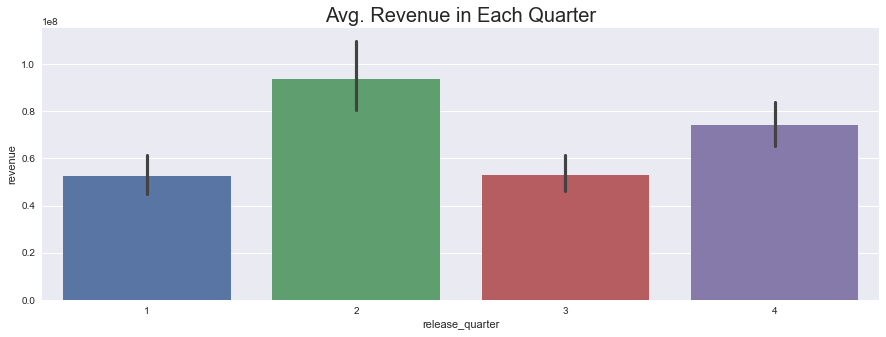

In [23]:
plt.figure(figsize=(15,5))
sns.barplot(x='release_quarter',y='revenue',data=train)
plt.title('Avg. Revenue in Each Quarter',fontsize=20)

Then, we tried to find the Quarter of the year and found 2nd quarter of the year is the most on average revenue earning quarter.

#### Logarithm Transformation <a id="eda5" />

Logarithm Transformation - When the distribution of the continuous data is non-normal, transformations of data are applied to make the data as “normal” as possible and, thus, increase the validity of the associated statistical analyses. The log transformation is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality.

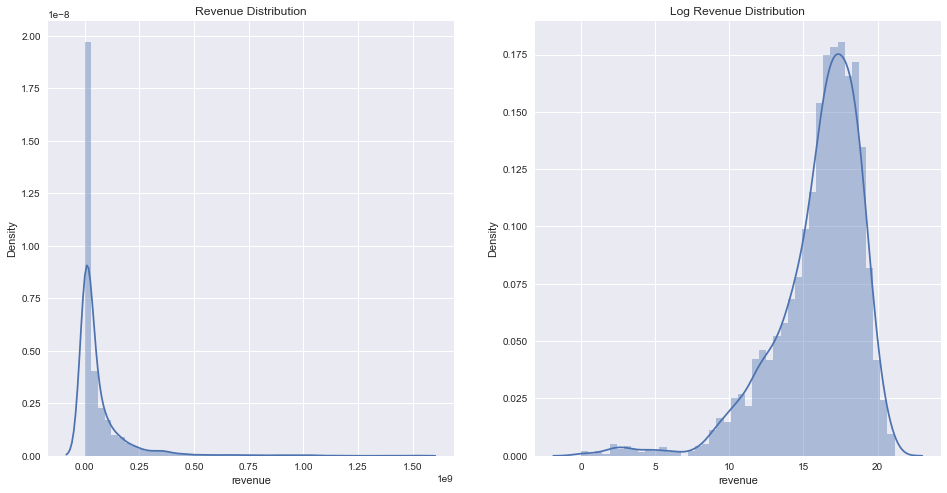

In [24]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.distplot(train.revenue)
plt.title('Revenue Distribution');
plt.subplot(1, 2, 2)
sns.distplot(np.log(train.revenue))
plt.title('Log Revenue Distribution');

We can see the distribution shape changed before and after log transformation. We can see on left graph that this data is very skewed and therefore it is difficult to draw a conclusion from this grap so we need to normalize this data. Therefore we have used log transformation normalize it.

#### Comparing Relationship with Revenue <a id="eda6" />

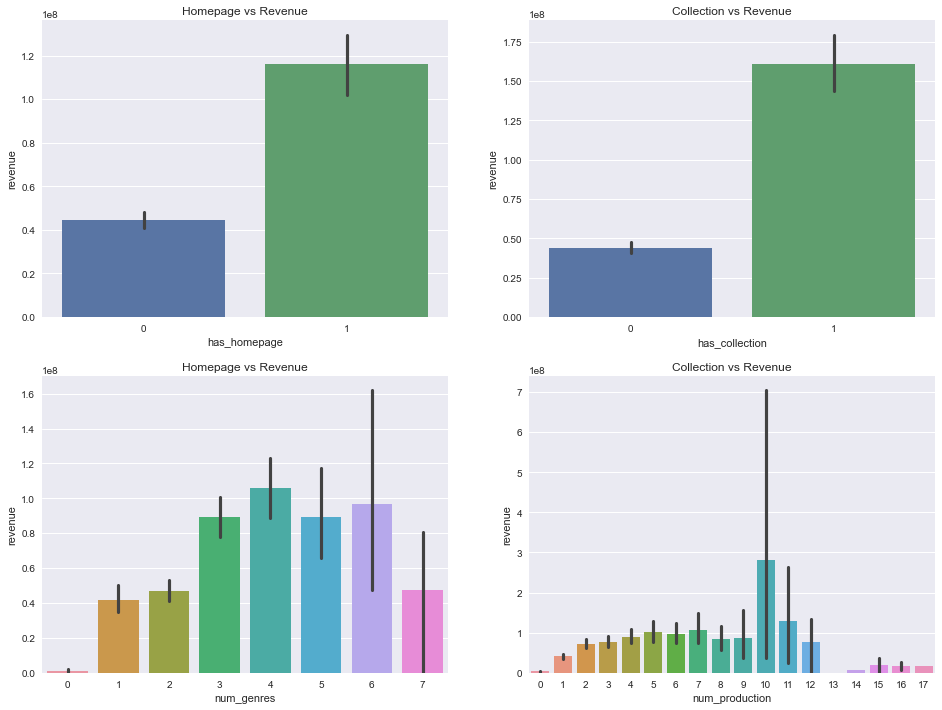

In [25]:
plt.figure(figsize=(16,12))

plt.subplot(2, 2, 1)
sns.barplot(x='has_homepage',y='revenue',data=train)
plt.title('Homepage vs Revenue');

plt.subplot(2, 2, 2)
sns.barplot(x='has_collection',y='revenue',data=train)
plt.title('Collection vs Revenue');

plt.subplot(2, 2, 3)
sns.barplot(x='num_genres',y='revenue',data=train)
plt.title('Homepage vs Revenue');

plt.subplot(2, 2, 4)
sns.barplot(x='num_production',y='revenue',data=train)
plt.title('Collection vs Revenue');

Here we are using a box plot because it’s very useful for identifying outliers.
If dataset has outliers, it will be easy to spot them with a boxplot. 

Text(0.5, 1.0, 'Boxplot of Runtime')

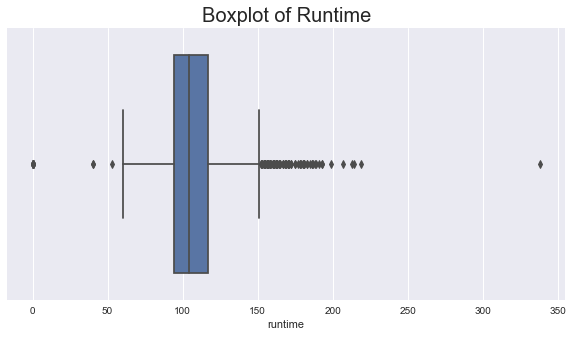

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(x=train['runtime'])
plt.title('Boxplot of Runtime',fontsize=20)

This boxplot shows that the median is in the middle of the box and the whiskers are about the same on both sides of the box, so above distribution is symmetric.

An outlier is an observation that is numerically distant from the rest of the data. This below boxplot shows lot of outliers.

#### Remove outlier <a id="eda7" />

Text(0.5, 1.0, 'Boxplot of Budget')

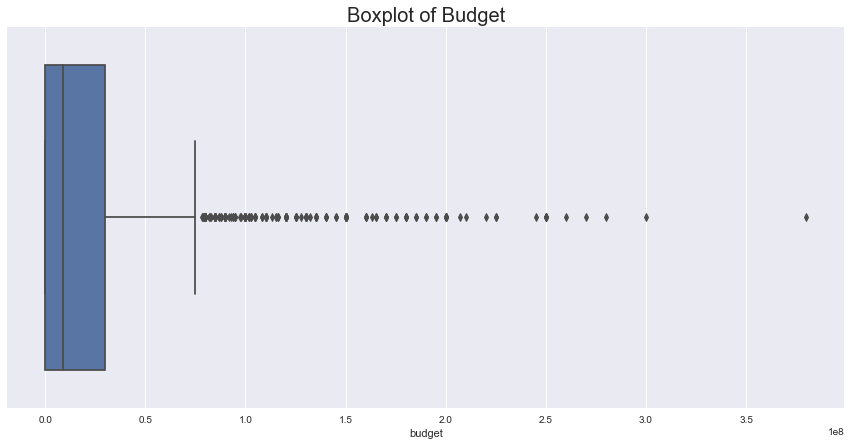

In [27]:
plt.figure(figsize=(15,7))
sns.boxplot(x=train['budget'])
plt.title('Boxplot of Budget',fontsize=20)

In [28]:
budget_low = train['budget'].quantile(0.01)
budget_hi = train['budget'].quantile(0.99)

runtime_low = train['runtime'].quantile(0.01)
runtime_hi = train['runtime'].quantile(0.99)

filtered_train = train[(train['budget']>budget_low) & (train['budget']<budget_hi) & 
                       (train['runtime']<runtime_hi) & (train['runtime']>runtime_low)]
filtered_train.shape

(1965, 19)

Text(0.5, 1.0, 'Boxplot of Runtime(Without outliers)')

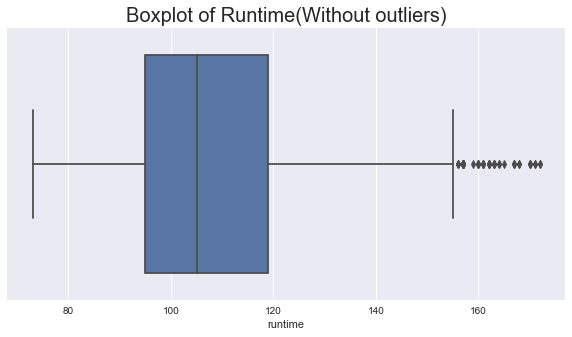

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(x=filtered_train['runtime'])
plt.title('Boxplot of Runtime(Without outliers)',fontsize=20)

Removing Outliers removes 885 rows. If the dataset was larger it may be useful to remove outliers but since the Dataset is so small it may be useful to keep the outliers in training our model.

#### Relationship Between the Home page and Revenue <a id ="eda8" />

This boxplot shows that the median is in the middle of the box and the whiskers are about the same on both sides of the box, so above distribution is symmetric.

Let’s find if having a home page affects revenue or not and also find out movies have a home page or not.

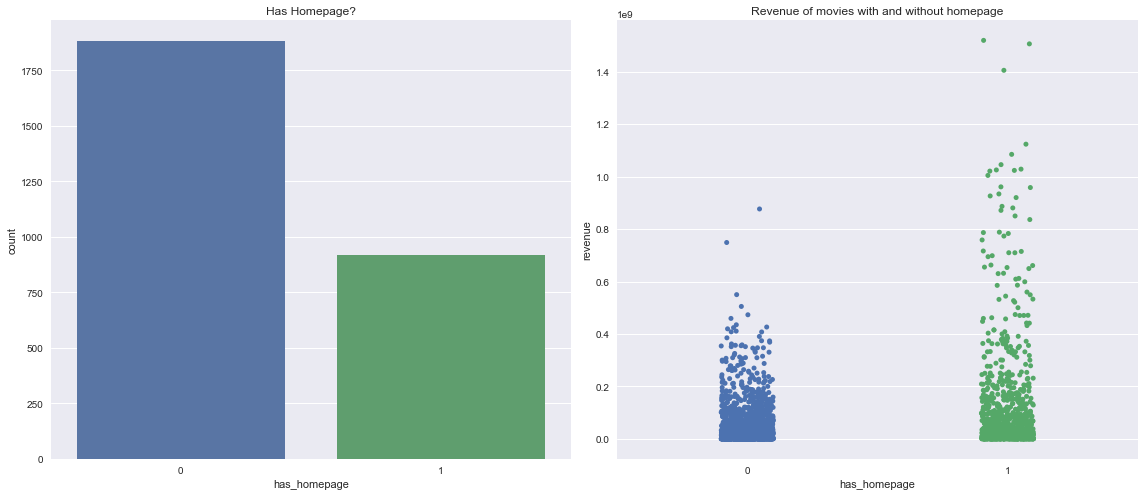

In [30]:
plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)
sns.countplot(train['has_homepage'])
plt.title("Has Homepage?")

plt.subplot(1, 2, 2)
sns.stripplot(x="has_homepage", y="revenue", data=train,)
plt.title('Revenue of movies with and without homepage');

plt.tight_layout()

This gives us an indication that the movies with homepage have a tendency to generate more revenue than without homepage.

#### Correlation Analysis <a id="eda9"/>

<AxesSubplot:>

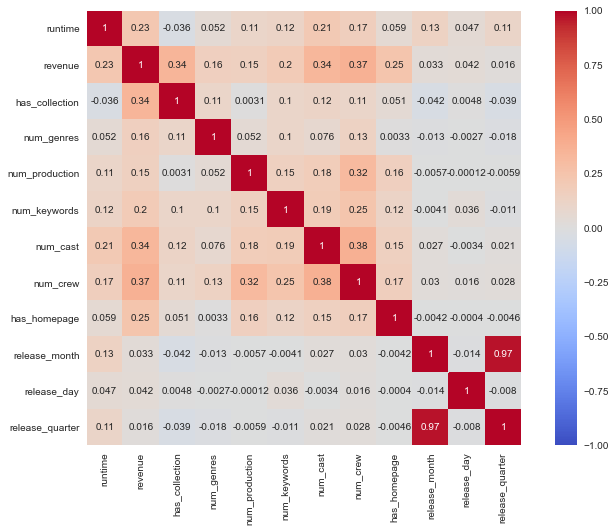

In [31]:
corrmat = train[['runtime','revenue','has_collection','num_genres','num_production','num_keywords','num_cast','num_crew','has_homepage','release_month','release_day','release_quarter']].corr()
plt.subplots(figsize=(12, 8))
sns.heatmap(corrmat, square=True, cmap='coolwarm', annot=True,vmin=-1)

From this above chart, we can see that the corr value of revenue with the has_collection has 0.34 and corr between revenue and runtime has 0.23 units.

#### Correlation between Revenue and Budget <a id="eda10"/>

Text(0.5, 1.0, 'Correlation 0.75')

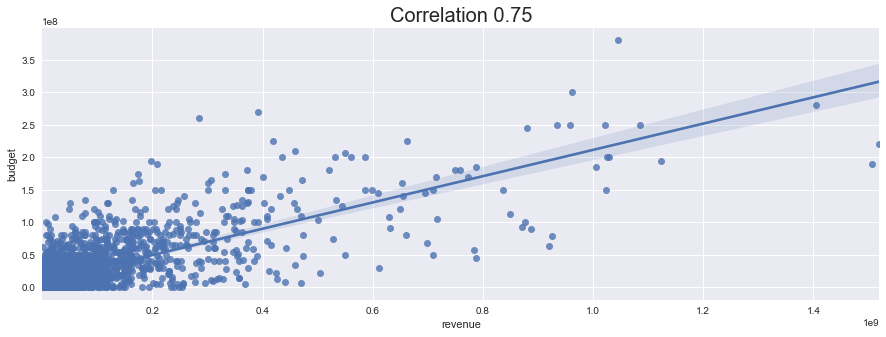

In [32]:
plt.figure(figsize=(15,5))
sns.regplot(x=train['revenue'],y=train['budget'])
correlation = np.corrcoef(train['budget'], train['revenue'])[0,1]
plt.title("Correlation {:.2f}".format(correlation),fontsize=20)

#### Correlation between Revenue and Popularity <a id="eda11" />

Text(0.5, 1.0, 'Correlation 0.50')

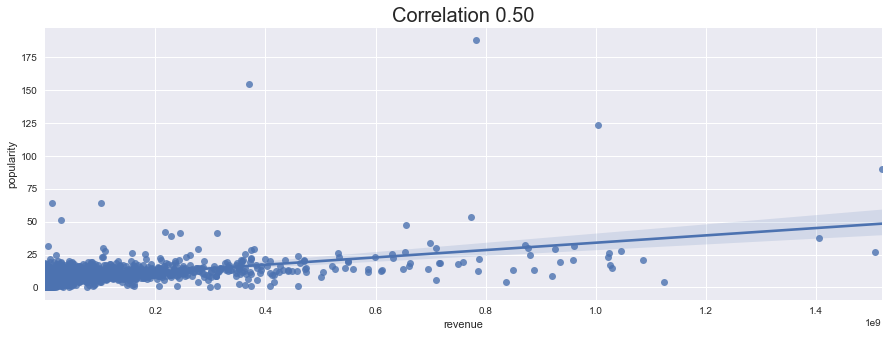

In [33]:
plt.figure(figsize=(15,5))
sns.regplot(x=train['revenue'],y=train['popularity'])
correlation = np.corrcoef(train['popularity'], train['revenue'])[0,1]
plt.title("Correlation {:.2f}".format(correlation),fontsize=20)

# Model Evaluation <a id="evaluation"/>
In this section we are going to apply different regression models and evaluate their performances. Finally, select one that has the best accuracy over the others and submit to kaggle to view our ranking.

First we convert the revenue to log as explained in the data exploration part.

In [34]:
train['revenue'] = np.log1p(train['revenue'])

From the data exploration part we have selected certain feature variables for model evaluation.

In [35]:
columns_for_train = ['popularity','budget','runtime', 'has_collection', 'num_genres', 'num_production', 'num_keywords',
       'num_cast', 'num_crew', 'has_homepage', 'release_month', 'release_day',
       'release_quarter', 'release_year','revenue']
columns_for_test = ['popularity','budget','runtime', 'has_collection', 'num_genres', 'num_production', 'num_keywords',
       'num_cast', 'num_crew', 'has_homepage', 'release_month', 'release_day',
       'release_quarter', 'release_year']

train_df = train[columns_for_train]
test_df = test[columns_for_test]

Though we have train and test dataset but we are going to split the train dataset into train and test because our actual test dataset does not have target value(`revenue`).

In [36]:
X = train_df.drop('revenue',axis=1)
y = train_df.revenue

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=39)

In [37]:
def PrintModelMatrix(model,X_test,y_test):
    print("Accuacy rate: {:.2f}%".format(model.score(X_test,y_test)*100))
    prediction = model.predict(X_test)
    print('MSE :',mean_squared_error(y_test, prediction))
    print('RMSE :',math.sqrt(mean_squared_error(y_test, prediction)))
    
    return model.score(X_test,y_test) 

We will save all the models performance in this table.

In [38]:
names = []
scores = []

### Linear Regression <a id="lr" />

Let's fit our Linear Regression model with train data and see how our algorithm works with our filtered dataset.

In [39]:
lr = LinearRegression().fit(X_train,y_train)

names.append("Linear Regression")
scores.append(PrintModelMatrix(lr,X_test,y_test))

Accuacy rate: 36.37%
MSE : 6.381813611987645
RMSE : 2.5262251704841443


In [40]:
# lr = LinearRegression().fit(X_train,y_train)
# print(lr.score(X_test,y_test))

# pred = lr.predict(test[columns_for_test].fillna(1))

# submission['revenue'] = np.round(np.expm1(pred))
# submission.to_csv(r'linear_regression.csv',index = False)

In [41]:
from sklearn.linear_model import Lasso

la = Lasso(alpha=0.1).fit(X_train,y_train)

names.append("Lasso Regression")
scores.append(PrintModelMatrix(la,X_test,y_test))

Accuacy rate: 35.18%
MSE : 6.500877210247661
RMSE : 2.549681786075992


In [42]:
# pred = model.predict(test[columns_for_test].fillna(1))
# submission['revenue'] = np.round(np.expm1(pred))
# submission.to_csv(r'lasso.csv',index = False)

In [43]:
# rf = RandomForestRegressor(
#     n_estimators = 20, 
#     min_samples_leaf = 4, 
#     max_features = 0.3, 
#     n_jobs = -1,
#     oob_score = True, 
#     random_state = 42,
# )
rf = RandomForestRegressor().fit(X_train, y_train)
names.append("Random Forest Regressor")
scores.append(PrintModelMatrix(rf,X_test,y_test))

Accuacy rate: 47.35%
MSE : 5.280206607493383
RMSE : 2.297870015360613


In [44]:
# predictions = rf.predict(test[columns_for_test].fillna(10000))
# submission['revenue'] = np.round(predictions)
# submission.to_csv('submission_simple_rf.csv', index = False)

In [45]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [47]:
rf = RandomForestRegressor()

In [48]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [49]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [50]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [51]:
rf = RandomForestRegressor(n_estimators=800,min_samples_split=2,min_samples_leaf=2,max_features='sqrt',
                          max_depth=50,bootstrap=False).fit(X_train,y_train)

In [52]:
names.append("Random Forest Regressor with Hypertuned Parameter")
scores.append(PrintModelMatrix(rf,X_test,y_test))

Accuacy rate: 49.05%
MSE : 5.109516013003854
RMSE : 2.260423856935653


In [53]:
scores_df = pd.DataFrame(zip(names,scores), columns=['Classifier', 'Accuracy Score'])
print(scores_df)

                                          Classifier  Accuracy Score
0                                  Linear Regression        0.363690
1                                   Lasso Regression        0.351819
2                            Random Forest Regressor        0.473528
3  Random Forest Regressor with Hypertuned Parameter        0.490547


In [54]:
round(0.363690,4)*100

36.370000000000005

In [ ]:
# predictions = rf.predict(test[columns_for_test].fillna(10000))
# submission['revenue'] = np.round(predictions)
# submission.to_csv('submission_simple_rf.csv', index = False)

In [57]:
 predictions = rf.predict(test[columns_for_test])

In [60]:
submission['revenue'] = np.round(np.expm1(predictions))
submission.to_csv('submission_simple_rf.csv', index = False)